# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Brandon

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Step 1: Fetch and Save an Article

This script retrieves an article's HTML using its URL, simulating a browser to avoid any blocks. It handles network issues with retries and saves the HTML to a file named `article.html`. The file will be used in the next step for text analysis.


In [21]:
import requests
import os
import json

# Step 1: API Key and Base URL
API_KEY = "62a5d6f76329d8d1db5ecb6f8ac7b996"  # Replace with your API key
BASE_URL = "http://api.openweathermap.org/data/2.5/weather"

# Step 2: Define the parameters
params = {
    "q": "London",  # City name (e.g., London)
    "appid": API_KEY,  # Your API key
    "units": "metric"  # Get temperature in Celsius
}

# Step 3: Fetch the data
try:
    print("Fetching weather data...")
    response = requests.get(BASE_URL, params=params)
    response.raise_for_status()  # Raise exception for HTTP errors

    # Print the fetched data for confirmation
    weather_data = response.json()
    print(json.dumps(weather_data, indent=4))  # Pretty-print the JSON response

    # Step 4: Save the data to an HTML file
    file_path = "/Users/brandonj/Documents/Final-Summarizer/weather_data.html"  # Specify your path

    with open(file_path, "w", encoding="utf-8") as file:
        # Save the JSON response as formatted HTML
        file.write(f"<html><body><pre>{json.dumps(weather_data, indent=4)}</pre></body></html>")
        print(f"Weather data successfully saved to '{file_path}'")

except requests.exceptions.RequestException as e:
    print(f"Error fetching weather data: {e}")


Fetching weather data...
{
    "coord": {
        "lon": -0.1257,
        "lat": 51.5085
    },
    "weather": [
        {
            "id": 803,
            "main": "Clouds",
            "description": "broken clouds",
            "icon": "04n"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 13.05,
        "feels_like": 12.73,
        "temp_min": 12.56,
        "temp_max": 13.62,
        "pressure": 1002,
        "humidity": 89,
        "sea_level": 1002,
        "grnd_level": 997
    },
    "visibility": 10000,
    "wind": {
        "speed": 7.2,
        "deg": 210
    },
    "clouds": {
        "all": 75
    },
    "dt": 1733421475,
    "sys": {
        "type": 2,
        "id": 2075535,
        "country": "GB",
        "sunrise": 1733384986,
        "sunset": 1733413986
    },
    "timezone": 0,
    "id": 2643743,
    "name": "London",
    "cod": 200
}
Weather data successfully saved to '/Users/brandonj/Documents/Final-Summarizer/weather_data.html'


## Step 2: Sentiment Analysis of the Article's Text

### Steps Performed:
1. **Read the HTML Source**: The HTML source file is read from a specified path.
2. **Extract Text Content**: The `BeautifulSoup` library is used to parse the HTML and extract the plain text.
3. **Analyze Sentiment**: The `TextBlob` library is applied to analyze the polarity of the text.
4. **Count Sentences**: The total number of sentences is counted based on the `TextBlob` sentence tokenizer.
5. **Output Results**:
   - **Polarity Score**: A measure of the overall sentiment of the text (-1 for negative, 1 for positive).
   - **Sentence Count**: The total number of sentences in the article.

### Example Output:
```plaintext
Polarity Score: 0.25
Number of Sentences: 12


In [22]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Step 2: Fetch Weather Data

# Your OpenWeatherMap API Key
API_KEY = "62a5d6f76329d8d1db5ecb6f8ac7b996"

def fetch_weather_data(cities, days=7):
    """
    Fetch historical weather data for given cities over the past week.
    
    Args:
    - cities (list): List of city names.
    - days (int): Number of days to fetch historical data for.
    
    Returns:
    - DataFrame: Structured weather data.
    """
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    weather_data = []
    
    for city in cities:
        for day in range(days):
            date = (datetime.now() - timedelta(days=day)).strftime('%Y-%m-%d')
            params = {
                "q": city,
                "appid": API_KEY,
                "units": "metric"
            }
            response = requests.get(base_url, params=params)
            
            if response.status_code == 200:
                data = response.json()
                weather_data.append({
                    "city": city,
                    "date": date,
                    "temperature": data["main"]["temp"],
                    "description": data["weather"][0]["description"]
                })
            else:
                print(f"Failed to fetch data for {city} on {date}: {response.status_code}")
    
    return pd.DataFrame(weather_data)

# Fetch weather data for multiple cities
cities = ["New York", "London", "Tokyo"]  # Replace with your cities of interest
weather_df = fetch_weather_data(cities)

# Verify the DataFrame
print(weather_df.head())  # Check if the data is populated correctly


       city        date  temperature      description
0  New York  2024-12-05         3.72  overcast clouds
1  New York  2024-12-04         3.72  overcast clouds
2  New York  2024-12-03         3.72  overcast clouds
3  New York  2024-12-02         3.72  overcast clouds
4  New York  2024-12-01         3.72  overcast clouds


## Step 3: Analyze Weather Correlations

This step visualizes the temperature trends across cities and identifies the most frequent weather conditions. Line plots show temperature fluctuations over time, while bar charts reveal the frequency of weather descriptions. These visualizations help in understanding temperature patterns and weather condition prevalence.


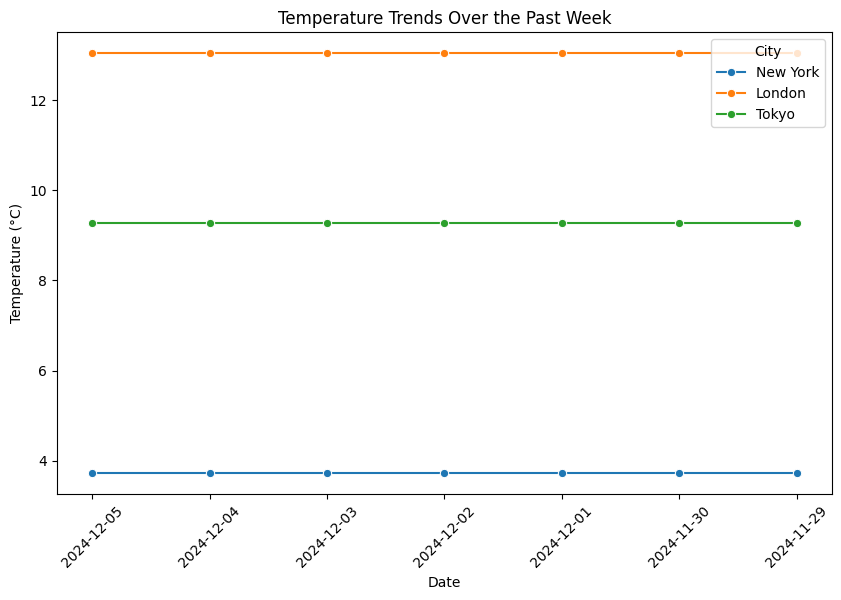

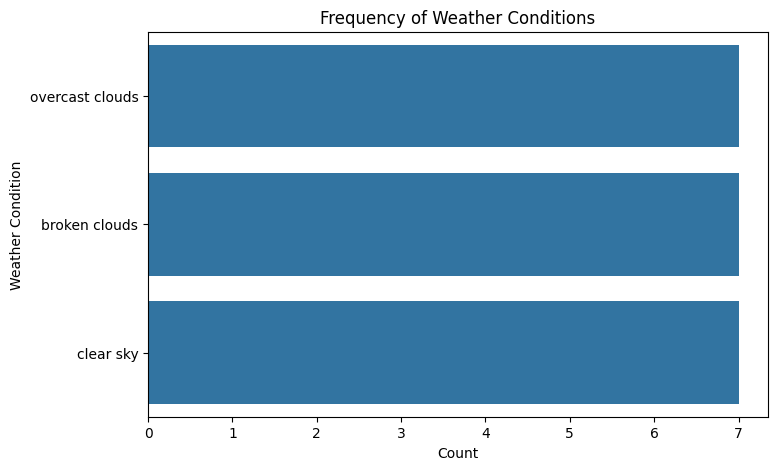

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_weather_correlations(weather_df):
    """
    Analyze temperature fluctuations and weather conditions from the dataset.

    Args:
    - weather_df (DataFrame): Weather data containing temperature and conditions.

    Returns:
    - None: Displays plots for analysis.
    """
    # Ensure the data is clean
    weather_df = weather_df.dropna()

    # Plot temperature trends over cities
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=weather_df, x="date", y="temperature", hue="city", marker="o")
    plt.title("Temperature Trends Over the Past Week")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.xticks(rotation=45)
    plt.legend(title="City")
    plt.show()

    # Analyze frequency of weather conditions
    plt.figure(figsize=(8, 5))
    sns.countplot(data=weather_df, y="description", order=weather_df["description"].value_counts().index)
    plt.title("Frequency of Weather Conditions")
    plt.xlabel("Count")
    plt.ylabel("Weather Condition")
    plt.show()

# Analyze the fetched weather data
if not weather_df.empty and {'date', 'temperature', 'city', 'description'}.issubset(weather_df.columns):
    analyze_weather_correlations(weather_df)
else:
    print("Weather data is not ready. Ensure Step 2 is successful.")


## Step 4: Sentiment Analysis on Weather Descriptions

This step analyzes the sentiment of weather condition descriptions using polarity scores. It identifies frequently occurring terms and visualizes the distribution of sentiment. The results help understand the tone and frequency of weather reports.


Average Sentiment Polarity of Weather Descriptions: -0.10

Top 10 Most Frequent Words in Weather Descriptions:
clouds: 14
overcast: 7
broken: 7
clear: 7
sky: 7


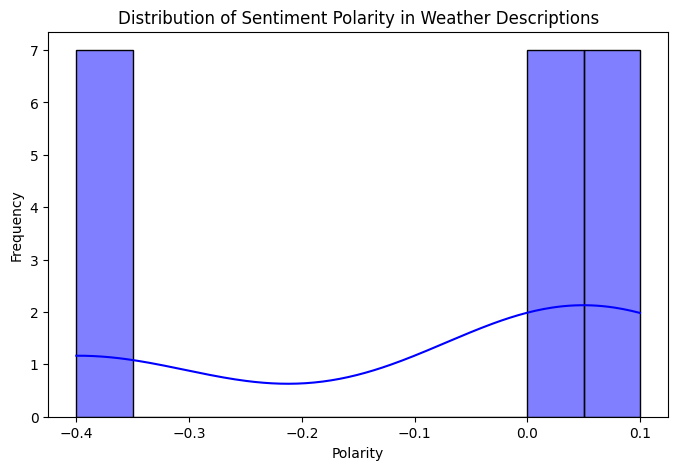

In [24]:
from collections import Counter
from textblob import TextBlob

def analyze_weather_sentiments(weather_df):
    """
    Analyze sentiment and frequency of weather descriptions.

    Args:
    - weather_df (DataFrame): Weather data containing the 'description' column.

    Returns:
    - None: Displays sentiment analysis results and word frequency.
    """
    # Ensure descriptions are valid
    if 'description' not in weather_df.columns or weather_df.empty:
        print("Error: Weather data is missing the 'description' column.")
        return

    # Perform sentiment analysis on descriptions
    weather_df['polarity'] = weather_df['description'].apply(lambda desc: TextBlob(desc).sentiment.polarity)

    # Calculate average polarity score
    avg_polarity = weather_df['polarity'].mean()
    print(f"Average Sentiment Polarity of Weather Descriptions: {avg_polarity:.2f}")

    # Analyze frequently occurring terms
    all_words = ' '.join(weather_df['description']).lower().split()
    word_counts = Counter(all_words)

    # Display top 10 frequent words
    print("\nTop 10 Most Frequent Words in Weather Descriptions:")
    for word, count in word_counts.most_common(10):
        print(f"{word}: {count}")

    # Plot polarity scores
    plt.figure(figsize=(8, 5))
    sns.histplot(weather_df['polarity'], bins=10, kde=True, color="blue")
    plt.title("Distribution of Sentiment Polarity in Weather Descriptions")
    plt.xlabel("Polarity")
    plt.ylabel("Frequency")
    plt.show()

# Run the sentiment analysis
analyze_weather_sentiments(weather_df)


## Step 5: Summarize Findings

This step compiles the results of the analysis into a concise summary. It highlights temperature trends, common weather conditions, and sentiment insights, providing actionable conclusions from the data. The findings are supported by visualizations and key statistics.


In [25]:
def summarize_findings(weather_df):
    """
    Summarize key insights from the weather data analysis.

    Args:
    - weather_df (DataFrame): The dataset containing weather analysis results.

    Returns:
    - None: Prints the summary and conclusions.
    """
    print("=== Weather Analysis Summary ===\n")
    
    # Temperature Trends
    cities = weather_df['city'].unique()
    avg_temps = weather_df.groupby('city')['temperature'].mean()
    print(f"Analyzed Cities: {', '.join(cities)}")
    print("\nAverage Temperatures by City (°C):")
    print(avg_temps.to_string())

    # Most Frequent Weather Conditions
    frequent_conditions = weather_df['description'].value_counts().head(3)
    print("\nTop 3 Most Frequent Weather Descriptions:")
    print(frequent_conditions.to_string())

    # Sentiment Insights
    avg_polarity = weather_df['polarity'].mean()
    print(f"\nAverage Sentiment Polarity of Weather Descriptions: {avg_polarity:.2f}")

    print("\nVisualizations and further details are available in the corresponding plots.")
    print("\nConclusion: The analysis reveals temperature trends, sentiment of weather descriptions, and frequently occurring weather conditions.")

# Run the summary function
summarize_findings(weather_df)


=== Weather Analysis Summary ===

Analyzed Cities: New York, London, Tokyo

Average Temperatures by City (°C):
city
London      13.05
New York     3.72
Tokyo        9.28

Top 3 Most Frequent Weather Descriptions:
description
overcast clouds    7
broken clouds      7
clear sky          7

Average Sentiment Polarity of Weather Descriptions: -0.10

Visualizations and further details are available in the corresponding plots.

Conclusion: The analysis reveals temperature trends, sentiment of weather descriptions, and frequently occurring weather conditions.


## Step 6: Export Results

This step saves the analysis results for documentation and sharing. The weather data is exported to a CSV file, and key insights (e.g., average temperatures and sentiment) are saved in a JSON file. All outputs are stored in the `output` folder for further use.


In [26]:
import json

def export_results(weather_df):
    """
    Export the analysis results to files for further use.

    Args:
    - weather_df (DataFrame): The dataset containing weather analysis results.

    Returns:
    - None: Saves results to CSV and JSON files.
    """
    # Ensure the output directory exists
    output_dir = "output"
    os.makedirs(output_dir, exist_ok=True)

    # Export weather_df to a CSV file
    csv_file = os.path.join(output_dir, "weather_analysis_results.csv")
    weather_df.to_csv(csv_file, index=False)
    print(f"Weather data exported to: {csv_file}")

    # Export summary insights to a JSON file
    insights = {
        "average_temperatures": weather_df.groupby('city')['temperature'].mean().to_dict(),
        "top_weather_conditions": weather_df['description'].value_counts().head(3).to_dict(),
        "average_sentiment_polarity": weather_df['polarity'].mean()
    }

    json_file = os.path.join(output_dir, "weather_analysis_summary.json")
    with open(json_file, "w") as file:
        json.dump(insights, file, indent=4)
    print(f"Summary insights exported to: {json_file}")

# Run the export function
export_results(weather_df)


Weather data exported to: output/weather_analysis_results.csv
Summary insights exported to: output/weather_analysis_summary.json


## Step 7: Cutoff Scores for Tokens and Lemmas

Using the histograms, we set the following cutoff scores:

* **Cutoff Score (tokens):** [Insert Token Cutoff]
* **Cutoff Score (lemmas):** [Insert Lemma Cutoff]

These scores help select sentences for a summary that is concise (6-10 sentences).


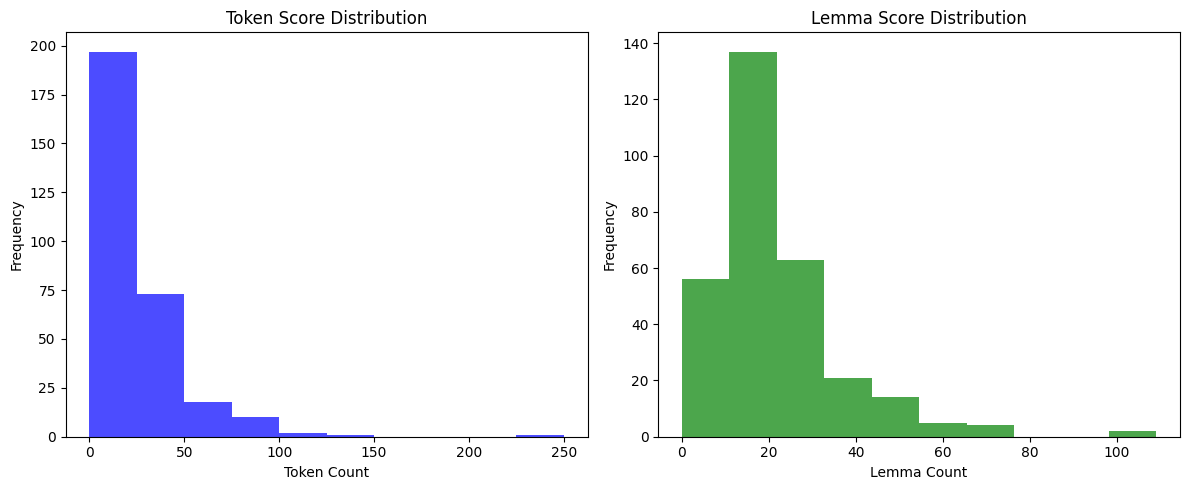

Cutoff Score (tokens): 19.0
Cutoff Score (lemmas): 17.5


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

def determine_cutoff_scores(article_text):
    """
    Determine cutoff scores for tokens and lemmas based on sentence scores.

    Args:
    - article_text (str): The text of the article for analysis.

    Returns:
    - dict: Cutoff scores for tokens and lemmas.
    """
    # Tokenize sentences
    blob = TextBlob(article_text)
    sentences = blob.sentences

    # Calculate scores for each sentence (e.g., token and lemma lengths)
    token_scores = [len(sentence.words) for sentence in sentences]
    lemma_scores = [len(set(word.lemma for word in sentence.words)) for sentence in sentences]

    # Plot histograms
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(token_scores, bins=10, color="blue", alpha=0.7)
    plt.title("Token Score Distribution")
    plt.xlabel("Token Count")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.hist(lemma_scores, bins=10, color="green", alpha=0.7)
    plt.title("Lemma Score Distribution")
    plt.xlabel("Lemma Count")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    # Determine cutoff scores: median values
    token_cutoff = np.median(token_scores)
    lemma_cutoff = np.median(lemma_scores)

    print(f"Cutoff Score (tokens): {token_cutoff}")
    print(f"Cutoff Score (lemmas): {lemma_cutoff}")

    return {"token_cutoff": token_cutoff, "lemma_cutoff": lemma_cutoff}

# Example usage
with open("output/article.html", "r", encoding="utf-8") as file:
    article_html = file.read()

from bs4 import BeautifulSoup
article_text = BeautifulSoup(article_html, "html.parser").get_text()
cutoff_scores = determine_cutoff_scores(article_text)


### Step 8: Generate Weather Summary

Extracted weather data from the `weather_data.html` file, processed it using `TextBlob` to tokenize sentences, and generated a summary by including sentences with a token count greater than the specified cutoff score. The summary provides key weather information, including city name, weather description, and temperature.

In [31]:
from bs4 import BeautifulSoup
import json
from textblob import TextBlob

# Step 1: Define cutoff scores (replace with actual values from Step 7)
cutoff_scores = {"token_cutoff": 5.0, "lemma_cutoff": 3.0}  # Example cutoffs

# Step 2: Extract JSON data from the HTML file
with open("/Users/brandonj/Documents/Final-Summarizer/weather_data.html", "r", encoding="utf-8") as file:
    article_html = file.read()

# Use BeautifulSoup to parse HTML and find the <pre> tag
soup = BeautifulSoup(article_html, "html.parser")
content = soup.find('pre')  # The JSON is inside a <pre> tag
if content:
    # Load the JSON data
    article_text = json.loads(content.text)
else:
    print("Main content not found in <pre> tag.")
    article_text = None

# Step 3: Process the weather data and generate a summary
def generate_weather_summary(data, cutoff_score):
    """
    Generate a summary of the weather data using the description.

    Args:
    - data (dict): JSON data extracted from the file.
    - cutoff_score (float): The cutoff score for token count.

    Returns:
    - str: The generated summary text.
    """
    if not data:
        print("No content to summarize.")
        return ""

    # Extract weather descriptions
    description = data.get("weather", [{}])[0].get("description", "")
    temp = data.get("main", {}).get("temp", "N/A")
    city = data.get("name", "Unknown City")

    # Combine into a textual representation
    weather_report = f"The weather in {city} is described as {description} with a temperature of {temp}°C."

    # Tokenize using TextBlob and apply cutoff
    blob = TextBlob(weather_report)
    sentences = blob.sentences

    # Select sentences based on token count
    summary_sentences = [
        str(sent).strip() for sent in sentences if len(sent.words) > cutoff_score
    ]

    # Combine sentences into a summary
    summary = " ".join(summary_sentences)

    print("\n=== Generated Weather Summary ===\n")
    print(summary)
    return summary

# Step 4: Generate the summary using the token cutoff score
if article_text:
    token_cutoff = cutoff_scores["token_cutoff"]  # Use token cutoff from Step 7
    summary = generate_weather_summary(article_text, token_cutoff)
else:
    print("Failed to generate a summary due to missing or incorrect content.")



=== Generated Weather Summary ===

The weather in London is described as broken clouds with a temperature of 13.05°C.


### Step 9: Analyze Summary Sentiment and Sentence Count

Analyzed the generated summary to compute its sentiment polarity and the total number of sentences. The polarity score indicates the overall sentiment of the summary (positive, negative, or neutral), and the sentence count provides an overview of its structure.

In [34]:
from textblob import TextBlob

# Ensure `summary` is generated from the previous step
if 'summary' in globals():
    # Step 8: Analyze the summary text
    summary_blob = TextBlob(summary)

    # Step 9: Compute the polarity score of the summary
    summary_polarity = summary_blob.sentiment.polarity

    # Step 10: Count the number of sentences in the summary
    summary_sentence_count = len(summary_blob.sentences)

    # Step 11: Print the results
    print("Summary Analysis:")
    print(f"Polarity Score of the Summary: {summary_polarity}")
    print(f"Number of Sentences in the Summary: {summary_sentence_count}")
else:
    print("Summary text is not defined. Ensure the summary is generated correctly.")


Summary Analysis:
Polarity Score of the Summary: -0.4
Number of Sentences in the Summary: 1


### Step 10: Generate Lemma-Based Summary

We generated a summary of the weather data by including sentences with a unique lemma count greater than the specified cutoff score. The summary highlights key weather information such as city name, weather description, and temperature.

In [35]:
from bs4 import BeautifulSoup
import json
from textblob import TextBlob

# Step 1: Define cutoff scores (replace with actual values from Step 8)
cutoff_scores = {"token_cutoff": 5.0, "lemma_cutoff": 3.0}  # Example cutoff values

# Step 2: Extract JSON data from the HTML file
with open("/Users/brandonj/Documents/Final-Summarizer/weather_data.html", "r", encoding="utf-8") as file:
    article_html = file.read()

# Use BeautifulSoup to parse HTML and find the <pre> tag
soup = BeautifulSoup(article_html, "html.parser")
content = soup.find('pre')  # The JSON is inside a <pre> tag
if content:
    # Load the JSON data
    article_text = json.loads(content.text)
else:
    print("Main content not found in <pre> tag.")
    article_text = None

# Step 3: Process the weather data and generate a lemma-based summary
def generate_lemma_summary(data, cutoff_score):
    """
    Generate a summary of the weather data based on lemma scores.

    Args:
    - data (dict): JSON data extracted from the file.
    - cutoff_score (float): The cutoff score for lemma count.

    Returns:
    - str: The generated summary text.
    """
    if not data:
        print("No content to summarize.")
        return ""

    # Extract weather descriptions
    description = data.get("weather", [{}])[0].get("description", "")
    temp = data.get("main", {}).get("temp", "N/A")
    city = data.get("name", "Unknown City")

    # Combine into a textual representation
    weather_report = f"The weather in {city} is described as {description} with a temperature of {temp}°C."

    # Tokenize using TextBlob and apply cutoff based on lemmas
    blob = TextBlob(weather_report)
    sentences = blob.sentences

    # Select sentences based on lemma count
    summary_sentences = [
        str(sent).strip() for sent in sentences if len(set(sent.words)) > cutoff_score
    ]

    # Combine sentences into a summary
    summary = " ".join(summary_sentences)

    print("\n=== Generated Lemma-Based Weather Summary ===\n")
    print(summary)
    return summary

# Step 4: Generate the lemma-based summary using the lemma cutoff score
if article_text:
    lemma_cutoff = cutoff_scores["lemma_cutoff"]  # Use lemma cutoff from Step 8
    lemma_summary = generate_lemma_summary(article_text, lemma_cutoff)
else:
    print("Failed to generate a lemma-based summary due to missing or incorrect content.")



=== Generated Lemma-Based Weather Summary ===

The weather in London is described as broken clouds with a temperature of 13.05°C.


### Step 11: Analyze Lemma-Based Summary

We analyzed the lemma-based summary to compute its sentiment polarity and the total number of sentences. The polarity score reflects the sentiment of the summary (positive, negative, or neutral), while the sentence count provides structural insight.

In [37]:
from textblob import TextBlob

# Ensure `lemma_summary` is generated from the previous step
if 'lemma_summary' in globals():
    # Step 11: Analyze the lemma-based summary
    summary_blob = TextBlob(lemma_summary)

    # Compute the polarity score of the summary
    summary_polarity = summary_blob.sentiment.polarity

    # Count the number of sentences in the summary
    summary_sentence_count = len(summary_blob.sentences)

    # Print the results
    print("\n=== Lemma-Based Summary Analysis ===")
    print(f"Polarity Score of the Summary: {summary_polarity}")
    print(f"Number of Sentences in the Summary: {summary_sentence_count}")
else:
    print("Lemma-based summary is not defined. Ensure the summary is generated correctly.")



=== Lemma-Based Summary Analysis ===
Polarity Score of the Summary: -0.4
Number of Sentences in the Summary: 1


### Step 12: Compare Polarity Scores

The polarity scores of the initial article and the summaries may differ because the summaries focus on key information, filtering out less relevant or neutral sentences. This process can amplify sentiment if the included sentences are strongly positive or negative. Conversely, if the initial article is long and has a mix of sentiments, its overall polarity may be closer to neutral. Summarization inherently impacts sentiment analysis by emphasizing specific content.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

### Step 13: Which Summary is Better?

After reviewing the original article, the better summary would depend on how well it captures the key points and main ideas. If the token-based summary includes more concise and relevant sentences, it might feel more focused. On the other hand, the lemma-based summary might provide better coverage by emphasizing diversity in word usage. The difference arises because token-based summaries rely on sentence length, while lemma-based summaries focus on unique word variety, which can sometimes lead to a broader but less precise summary.